## Import modules

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

## Import data

In [2]:
df1 = pd.read_csv("2002.csv", encoding = "ISO-8859-1")
df2 = pd.read_csv("2003.csv")
df = pd.concat([df1, df2], ignore_index=True)
airports = pd.read_csv('airports.csv')
carriers = pd.read_csv('carriers.csv')
planedata = pd.read_csv('plane-data.csv')
variabledescriptions = pd.read_csv('variable-descriptions.csv')

C:\Users\user\AppData\Local\Temp\ipykernel_5092\38804688.py:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("2003.csv")


Investigate the first and last five row of **df** using `head()` and `tail()`function

In [5]:
# print the first five rows
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2002,1,13,7,2231.0,2235,2342.0,2353,US,723,...,3,13,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2002,1,14,1,2230.0,2235,2347.0,2353,US,723,...,3,14,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2002,1,15,2,2230.0,2235,2342.0,2353,US,723,...,3,14,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2002,1,16,3,2230.0,2235,2340.0,2353,US,723,...,3,10,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2002,1,17,4,2227.0,2235,2345.0,2353,US,723,...,5,13,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [6]:
# print the last five rows
df.tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11759894,2003,12,5,5,1126.0,1110,1326.0,1239,DL,794,...,31,20,0,NaN,0,0.0,0.0,31.0,0.0,16.0
11759895,2003,12,5,5,2100.0,2010,2240.0,2146,DL,798,...,8,21,0,NaN,0,3.0,0.0,4.0,0.0,47.0
11759896,2003,12,5,5,1142.0,1145,1217.0,1222,DL,799,...,4,15,0,NaN,0,0.0,0.0,0.0,0.0,0.0
11759897,2003,12,5,5,623.0,620,911.0,908,DL,800,...,6,14,0,NaN,0,0.0,0.0,0.0,0.0,0.0
11759898,2003,12,5,5,1024.0,1025,1626.0,1627,DL,800,...,6,21,0,NaN,0,0.0,0.0,0.0,0.0,0.0


## Deal with Missing Data

In [10]:
# calculate the percentage of missing values in each column
print((df.isnull().sum() / len(df)) * 100)


Year                  0.000000
Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               1.416781
CRSDepTime            0.000000
ArrTime               1.584614
CRSArrTime            0.000000
UniqueCarrier         0.000000
FlightNum             0.000000
TailNum               0.478405
ActualElapsedTime     1.584622
CRSElapsedTime        0.000009
AirTime               1.585643
ArrDelay              1.584622
DepDelay              1.416781
Origin                0.000000
Dest                  0.000000
Distance              0.000000
TaxiIn                0.000000
TaxiOut               0.000000
Cancelled             0.000000
CancellationCode     99.548517
Diverted              0.000000
CarrierDelay         67.552459
WeatherDelay         67.552459
NASDelay             67.552459
SecurityDelay        67.552459
LateAircraftDelay    67.552459
dtype: float64


Variables CancellationCode, Diverted, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay and LateAircraftDelay have over two third of missing values, thus we remove these seven variables.

In [3]:
df.drop(['CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], axis=1, inplace=True)

total rows of df

In [20]:
len(df)

11759899

percentage of missing values 

In [19]:
missing_rows = df.isnull().sum(axis=1)
(sum(missing_rows > 0) / df.shape[0]) * 100

1.5861445748811278

Out of 11759899 rows of data, only 1.586% contains missing values. It is more than enough, so just remove the 1.586% of data. 

In [4]:
df = df.dropna()

Double check `new **df**` doesn't contain missing values

In [28]:
df.count()

Year                 11573370
Month                11573370
DayofMonth           11573370
DayOfWeek            11573370
DepTime              11573370
CRSDepTime           11573370
ArrTime              11573370
CRSArrTime           11573370
UniqueCarrier        11573370
FlightNum            11573370
TailNum              11573370
ActualElapsedTime    11573370
CRSElapsedTime       11573370
AirTime              11573370
ArrDelay             11573370
DepDelay             11573370
Origin               11573370
Dest                 11573370
Distance             11573370
TaxiIn               11573370
TaxiOut              11573370
Cancelled            11573370
dtype: int64

In [29]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled
0,2002,1,13,7,2231.0,2235,2342.0,2353,US,723,...,78.0,55.0,-11.0,-4.0,PIT,CLT,366,3,13,0
1,2002,1,14,1,2230.0,2235,2347.0,2353,US,723,...,78.0,60.0,-6.0,-5.0,PIT,CLT,366,3,14,0
2,2002,1,15,2,2230.0,2235,2342.0,2353,US,723,...,78.0,55.0,-11.0,-5.0,PIT,CLT,366,3,14,0
3,2002,1,16,3,2230.0,2235,2340.0,2353,US,723,...,78.0,57.0,-13.0,-5.0,PIT,CLT,366,3,10,0
4,2002,1,17,4,2227.0,2235,2345.0,2353,US,723,...,78.0,60.0,-8.0,-8.0,PIT,CLT,366,5,13,0


## Create new x variables
According to the U.S. Department of Transportation, a flight is considered to be a delay if it departs or arrives 15 minutes or more later than the scheduled time. 

In [5]:
df['dDelay'] = df['DepDelay'].apply(lambda x: 1 if x >= 15 else 0)
df['aDelay'] = df['ArrDelay'].apply(lambda x: 1 if x >= 15 else 0)

Split a day into 4 parts

In [6]:
df['time'] = pd.cut(df['DepTime'], bins=[0, 600, 1200, 1800, 2400], 
                    labels=['0000-0600', '0600-1200', '1200-1800', '1800-2400'], 
                    include_lowest=True)

Create season variable

In [7]:
# create a new column "date" with datetime object
df['Day'] = df['DayofMonth']
df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# define the season ranges
winter = pd.to_datetime('2002-12-21 20:15:0')
autumn = pd.to_datetime('2002-9-23 0:56:0')
summer = pd.to_datetime('2002-6-21 9:24:0')
spring = pd.to_datetime('2002-3-20 14:16:0')

# create a new column "seasons" based on date column
df['seasons'] = np.select(
    [df['date'] >= winter, df['date'] >= autumn, df['date'] >= summer, df['date'] >= spring],
    ['Winter', 'Autumn', 'Summer', 'Spring'],
    default='Winter'
)


In [14]:
df.head(100)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,dDelay,aDelay,time,Day,date,seasons
0,2002,1,13,7,2231.0,2235,2342.0,2353,US,723,...,366,3,13,0,0,0,1800-2400,13,2002-01-13,Winter
1,2002,1,14,1,2230.0,2235,2347.0,2353,US,723,...,366,3,14,0,0,0,1800-2400,14,2002-01-14,Winter
2,2002,1,15,2,2230.0,2235,2342.0,2353,US,723,...,366,3,14,0,0,0,1800-2400,15,2002-01-15,Winter
3,2002,1,16,3,2230.0,2235,2340.0,2353,US,723,...,366,3,10,0,0,0,1800-2400,16,2002-01-16,Winter
4,2002,1,17,4,2227.0,2235,2345.0,2353,US,723,...,366,5,13,0,0,0,1800-2400,17,2002-01-17,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2002,1,21,1,955.0,935,1138.0,1118,US,728,...,546,4,24,0,1,1,0600-1200,21,2002-01-21,Winter
97,2002,1,22,2,934.0,935,1121.0,1118,US,728,...,546,3,30,0,0,0,0600-1200,22,2002-01-22,Winter
98,2002,1,23,3,934.0,935,1107.0,1118,US,728,...,546,2,14,0,0,0,0600-1200,23,2002-01-23,Winter
99,2002,1,24,4,930.0,935,1116.0,1118,US,728,...,546,5,26,0,0,0,0600-1200,24,2002-01-24,Winter


---

## Question 1

`Best time of day` to fly to minimize delays

In [17]:
# create a table of frequency of delays by time of day
freqtime = pd.Series(df.loc[df['dDelay'] == 1, 'time']).value_counts()

# create a table of frequency of all times of day
freqtime2 = pd.Series(df['time']).value_counts()

# calculate the proportion of delays by time of day
probt = freqtime / freqtime2
probt

Plot a bar chart of proportion of delays by `time of day`

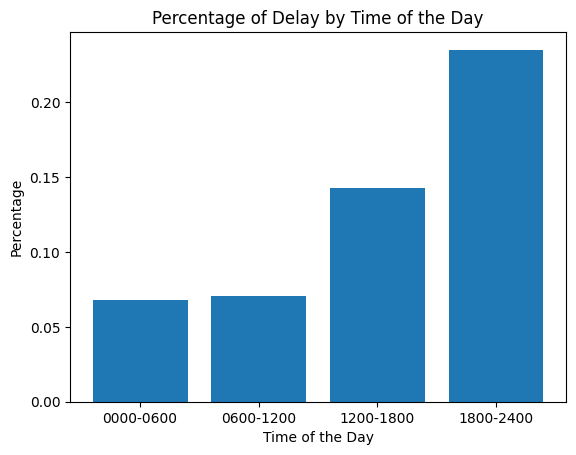

In [18]:
plt.bar(probt.index, probt.values)
plt.title('Percentage of Delay by Time of the Day')
plt.xlabel('Time of the Day')
plt.ylabel('Percentage')
plt.show()

Best `day of the week` to fly to minimize delays

In [20]:
# create a table of frequency of delays by day of a week
freqd = pd.Series(df.loc[df['dDelay'] == 1, 'DayOfWeek']).value_counts()

# create a table of frequency of all times of week
freqd2 = pd.Series(df['DayOfWeek']).value_counts()

# calculate the proportion of delays by day of a week
probd = freqd / freqd2
probd

1    0.135124
2    0.116200
3    0.122534
4    0.143822
5    0.157167
6    0.116770
7    0.141704
Name: DayOfWeek, dtype: float64

Plot a bar chart of proportion of delays by `day of week`

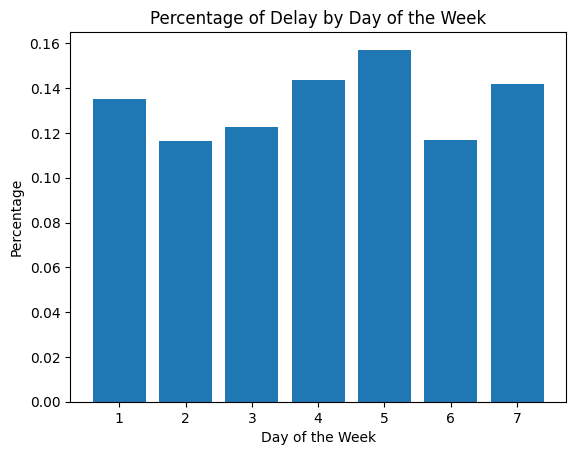

In [21]:
plt.bar(probd.index, probd.values)
plt.title('Percentage of Delay by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Percentage')
plt.show()

`Best month of the year` to fly to minimize delays

In [22]:
# create a table of frequency of delays by month of a year
freqmonth = pd.Series(df.loc[df['dDelay'] == 1, 'Month']).value_counts()

# create a table of frequency of all times of year
freqmonth2 = pd.Series(df['Month']).value_counts()

# calculate the proportion of delays by month of a year
probm = freqmonth / freqmonth2
probm

1     0.129082
2     0.138888
3     0.143844
4     0.112237
5     0.118367
6     0.150055
7     0.158809
8     0.147569
9     0.095172
10    0.105268
11    0.124609
12    0.177233
Name: Month, dtype: float64

Plot a bar chart of proportion of delays by `month of year`

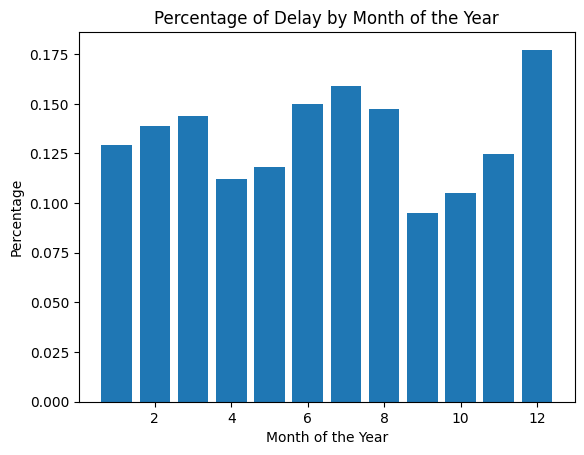

In [23]:
plt.bar(probm.index, probm.values)
plt.title('Percentage of Delay by Month of the Year')
plt.xlabel('Month of the Year')
plt.ylabel('Percentage')
plt.show()

`Best season of the year` to fly to minimize delays

In [24]:
# create a table of frequency of delays by season of a year
freqseason = pd.Series(df.loc[df['dDelay'] == 1, 'seasons']).value_counts()

# create a table of frequency of all times of year
freqseason2 = pd.Series(df['seasons']).value_counts()

# calculate the proportion of delays by season of a year
probs = freqseason / freqseason2
probs

Winter    0.132661
Summer    0.143819
Spring    0.137747
Autumn    0.123470
Name: seasons, dtype: float64

Plot a bar chart of proportion of delays by `season of year`

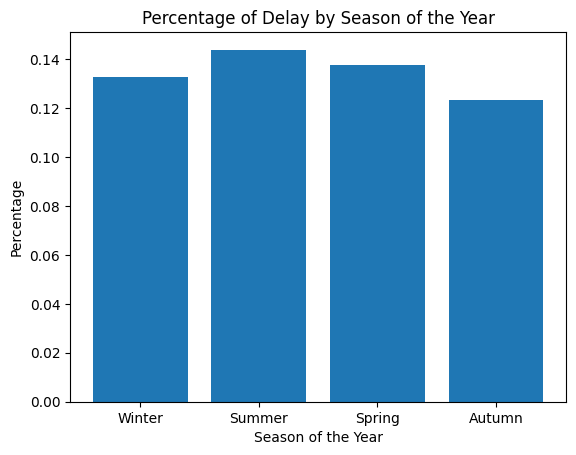

In [25]:
plt.bar(probs.index, probs.values)
plt.title('Percentage of Delay by Season of the Year')
plt.xlabel('Season of the Year')
plt.ylabel('Percentage')
plt.show()

---

## Question 2
Merge planedata and df to create age variable

In [8]:
planedata['TailNum'] = planedata['tailnum']
joindf = pd.merge(df, planedata, on='TailNum')


In [10]:
joindf = joindf.dropna()

In [11]:
# Find the rows where any column includes the string 'None'
rows_to_drop = joindf[joindf.apply(lambda x: 'None' in x.values, axis=1)].index

# Drop the rows
joindf.drop(index=rows_to_drop, inplace=True)



C:\Users\user\AppData\Local\Temp\ipykernel_5092\1846397116.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf.drop(index=rows_to_drop, inplace=True)


In [13]:
# Convert 'issue_date' column to POSIXct format with timezone
joindf['issue_date'] = pd.to_datetime(joindf['issue_date'], format="%m/%d/%Y")

# Calculate 'age' column as difference between 'date' and 'issue_date'
joindf['age'] = (pd.to_datetime(joindf['date']) - joindf['issue_date']).dt.days

# Convert 'year' column to numeric format
joindf['year'] = pd.to_numeric(joindf['year'])

# Convert 'age' column to numeric format in years
joindf['age'] = pd.to_numeric(joindf['age']) / 365

# Filter out rows where 'age' is negative
joindf = joindf[joindf['age'] >= 0]

C:\Users\user\AppData\Local\Temp\ipykernel_5092\3714604430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf['issue_date'] = pd.to_datetime(joindf['issue_date'], format="%m/%d/%Y")
C:\Users\user\AppData\Local\Temp\ipykernel_5092\3714604430.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf['age'] = (pd.to_datetime(joindf['date']) - joindf['issue_date']).dt.days
C:\Users\user\AppData\Local\Temp\ipykernel_5092\3714604430.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

Generate scatterplot of Delay vs Plane Age

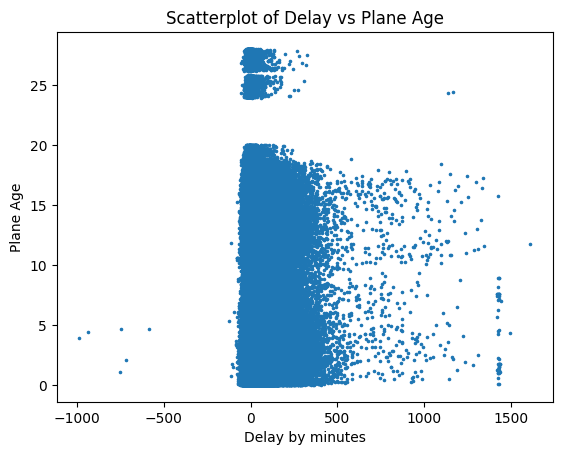

In [14]:
plt.scatter(joindf['ArrDelay'], joindf['age'], marker='.', s=10)
plt.title("Scatterplot of Delay vs Plane Age")
plt.xlabel("Delay by minutes")
plt.ylabel("Plane Age")
plt.show()

In [16]:
# Round age to nearest integer
joindf['age2'] = round(joindf['age'])

# Calculate frequency of age with arrival delay
freqage = joindf[joindf['aDelay'] == 1]['age2'].value_counts()

# Calculate frequency of age in entire dataset
freqage2 = joindf['age2'].value_counts()

# Calculate probability of delay given age
probage = freqage / freqage2

# Create a new dataframe from probabilities
df3 = pd.DataFrame({'age': probage.index, 'aDelay': probage.values})

# Convert age to integer
df3['age'] = df3['age'].astype(int)

# Perform Pearson correlation test
corr, p_val = pearsonr(df3['age'], df3['aDelay'])
print('Pearson correlation coefficient:', corr)
print('P-value:', p_val)

Pearson correlation coefficient: 0.07410669089044938
P-value: 0.7190096895409108


Plot barchart of Delay Percentage vs Age

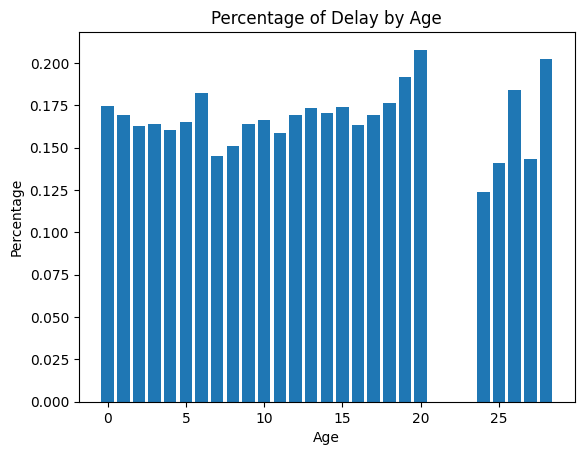

In [17]:
plt.bar(probage.index, probage.values)
plt.title('Percentage of Delay by Age')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.show()

---

## Question 3

In [32]:
# Create a new column 'location' by concatenating 'Origin' and 'Dest'
df1['location'] = df1['Origin'] + '-' + df1['Dest']
df2['location'] = df2['Origin'] + '-' + df2['Dest']

Top 10 frequently traveled locations in 2002.

In [ ]:
# Calculate the top 10 frequently traveled locations in 2002
top_10_values_1 = df1['location'].value_counts().nlargest(10)
top_10_values_1

Frequecny of top 10 2002 frequently traveled locations in 2003.

In [ ]:
# Calculate the frequency of the same 10 locations in 2003
top_10_values_2 = df2['location'].value_counts().loc[top_10_values_1.index]
top_10_values_2

Compute a table to compare the variations

In [33]:
# Create data frames for each year's flight frequencies
top_10_values_1 = top_10_values_1.reset_index().rename(columns={'index': 'location', 'location': 'frequency'})
top_10_values_2 = top_10_values_2.reset_index().rename(columns={'index': 'location', 'location': 'frequency'})

# Combine the data frames into one
flight_data = pd.concat([top_10_values_1, top_10_values_2], ignore_index=True)
flight_data['Year'] = pd.Series(['2002', '2003']).repeat(10).reset_index(drop=True)

# Compute table
flight_data_wide = flight_data.pivot(index='location', columns='Year', values='frequency').reset_index()
flight_data_wide[['Origin', 'Dest']] = flight_data_wide['location'].str.split('-', expand=True)

# join flight_data_wide with airports based on Origin and Dest columns
flight_data_wide = flight_data_wide.merge(airports, left_on='Origin', right_on='iata').merge(airports, left_on='Dest', right_on='iata', suffixes=('_origin', '_dest'))

# replace Origin and Dest columns with airport values
flight_data_wide['Origin'] = flight_data_wide['airport_origin']
flight_data_wide['Dest'] = flight_data_wide['airport_dest']

# remove other columns
flight_data_wide = flight_data_wide[['location','Origin', 'Dest', '2002', '2003']]
flight_data_wide

,location,Origin,Dest,2002,2003
0,BOS-LGA,Gen Edw L Logan Intl,LaGuardia,11539,12662
1,LAS-LAX,McCarran International,Los Angeles International,12526,11177
2,PHX-LAX,Phoenix Sky Harbor International,Los Angeles International,11066,10498
3,LAS-PHX,McCarran International,Phoenix Sky Harbor International,11143,10345
4,LAX-PHX,Los Angeles International,Phoenix Sky Harbor International,11027,10518
5,LAX-LAS,Los Angeles International,McCarran International,12733,11262
6,PHX-LAS,Phoenix Sky Harbor International,McCarran International,11091,10219
7,LGA-BOS,LaGuardia,Gen Edw L Logan Intl,11537,12568
8,MSP-ORD,Minneapolis-St Paul Intl,Chicago O'Hare International,12007,12377
9,ORD-MSP,Chicago O'Hare International,Minneapolis-St Paul Intl,11907,12254


Plot line chart

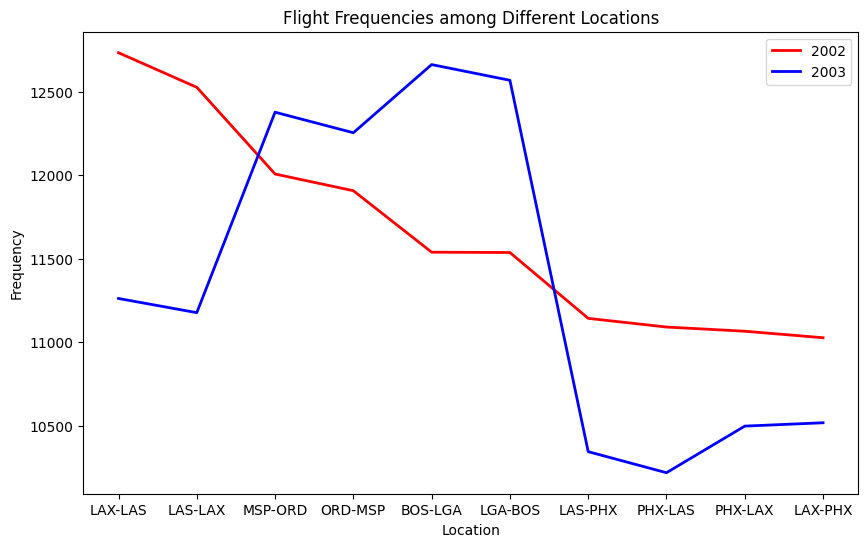

In [36]:
# Create line chart
fig, ax = plt.subplots(figsize=(10, 6))
for year, color in zip(flight_data['Year'].unique(), ['red', 'blue']):
    data = flight_data[flight_data['Year'] == year]
    ax.plot(data['location'], data['frequency'], color=color, linewidth=2, label=year)

# Set plot properties
ax.set_xlabel('Location')
ax.set_ylabel('Frequency')
ax.set_title('Flight Frequencies among Different Locations')
ax.legend()

# Show the plot
plt.show()

---

### Question 4

In [40]:
def detector(Y, M, D, T1, T2, A):
    lvl1 = df[(df['Year'] == Y) & (df['Month'] == M) & (df['DayofMonth'] == D) & 
              (df['CRSArrTime'] >= T1) & (df['CRSArrTime'] <= T2) & 
              (df['Dest'] == A) & (df['aDelay'] == 1)]
    lvl2 = df[(df['Year'] == Y) & (df['Month'] == M) & (df['DayofMonth'] == D) & 
              (df['CRSDepTime'] >= T1) & (df['CRSDepTime'] <= T2) & 
              (df['Origin'] == A) & (df['dDelay'] == 1) & (df['aDelay'] == 1)]
    if lvl1.shape[0] > 0 and lvl2.shape[0] > 0:
        airport_name = airports.loc[airports['iata'] == A, 'airport'].iloc[0]
        cascading_airports = airports.loc[airports['iata'].isin(lvl2['Dest']), 'airport'].to_list()
        return f"There was delay in {airport_name} airport from time {T1} to {T2}, which has created cascading delays in {', '.join(cascading_airports)}"
    elif lvl1.shape[0] > 0 and lvl2.shape[0] == 0:
        airport_name = airports.loc[airports['iata'] == A, 'airport'].iloc[0]
        return f"There was delay in {airport_name} airport from time {T1} to {T2}, but it does not create any cascading delay in other airports."
    else:
        airport_name = airports.loc[airports['iata'] == A, 'airport'].iloc[0]
        return f"There was no delay in {airport_name} airport from time {T1} to {T2}. So, it did not cause any cascading delay in other airports."


Example 1:

In [41]:
detector(2002,1,31,1500,1600,'CLT')

'There was delay in Charlotte/Douglas International airport from time 1500 to 1600, which has created cascading delays in Gen Edw L Logan Intl, Piedmont Triad International, Myrtle Beach International, Philadelphia Intl'

Example 2:

In [42]:
detector(2003,2,22,2300,2400,'BOS')

'There was delay in Gen Edw L Logan Intl airport from time 2300 to 2400, but it does not create any cascading delay in other airports.'

Example 3:

In [43]:
detector(2002,1,10,2200,2300,'PHX')

'There was no delay in Phoenix Sky Harbor International airport from time 2200 to 2300. So, it did not cause any cascading delay in other airports.'

---

## Question 5

Split Data into Dependent and Independent Variables

In [84]:
# refactor variables
joindf[['aDelay', 'Year', 'DayOfWeek', 'dDelay', 'time', 'seasons']] = joindf[['aDelay', 'Year', 'DayOfWeek', 'dDelay', 'time', 'seasons']].astype('category')

x_var = joindf[['Year', 'DayOfWeek', 'dDelay', 'time', 'seasons', 'age', 'Distance']].copy()
print(x_var.head())

y_var = joindf['aDelay'].copy()
print(y_var.head())

   Year DayOfWeek dDelay       time seasons       age  Distance
0  2002         1      0  1200-1800  Winter  3.046575      1608
1  2002         6      1  1200-1800  Winter  3.079452      1608
2  2002         2      0  1800-2400  Winter  3.049315      1608
3  2002         7      0  1200-1800  Winter  3.082192       668
4  2002         5      0  0600-1200  Winter  3.038356       956
0    0
1    1
2    0
3    0
4    0
Name: aDelay, dtype: category
Categories (2, int64): [0, 1]


Construct dummy variables for categorical data.

In [85]:
# set random seed
np.random.seed(2002)

# refactor variables
x_encoded = pd.get_dummies(x_var, columns=['Year', 'DayOfWeek', 'dDelay', 'time', 'seasons'])
x_encoded.head()

,age,Distance,Year_2002,Year_2003,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,...,dDelay_0,dDelay_1,time_0000-0600,time_0600-1200,time_1200-1800,time_1800-2400,seasons_Autumn,seasons_Spring,seasons_Summer,seasons_Winter
0,3.046575,1608,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,3.079452,1608,1,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
2,3.049315,1608,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,3.082192,668,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,3.038356,956,1,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1


In [69]:
x_encoded.head()

,age,Year_2002,Year_2003,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,dDelay_0,dDelay_1,time_0000-0600,time_0600-1200,time_1200-1800,time_1800-2400,seasons_Autumn,seasons_Spring,seasons_Summer,seasons_Winter
0,3.046575,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1,3.079452,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1
2,3.049315,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3,3.082192,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1
4,3.038356,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


Perform train test split

In [86]:
# Split the data into trainset and testset
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y_var, test_size = 0.3, random_state= 39) 

Construct logistic regression model that predict flight arrival delay by these variables, year, day of week, age, distance, departure delay, time of day and season of the year.

In [96]:
# build logistic regression model
logistic = LogisticRegression()
logistic.fit(x_train, y_train)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

[[1009155   25399]
 [  84184  121276]]
Accuracy: 0.9116276106560087
Specificity: 0.9754493240565499
Sensitivity: 0.5902657451572082
F1 Score:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95   1034554
           1       0.83      0.59      0.69    205460

    accuracy                           0.91   1240014
   macro avg       0.87      0.78      0.82   1240014
weighted avg       0.91      0.91      0.91   1240014

AUC: 0.782857534606879


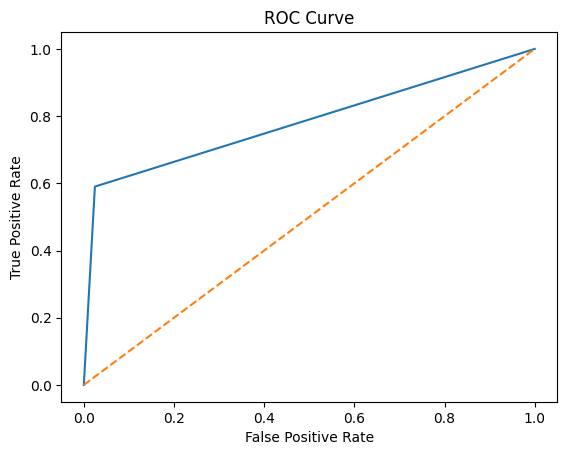

In [91]:
# get predicted values
y_pred = logistic.predict(x_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# calculate accuracy, specificity, and sensitivity
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print('Accuracy:', accuracy)
print('Specificity:', specificity)
print('Sensitivity:', sensitivity)

# calculate F1 score
f1_score = classification_report(y_test, y_pred)
print('F1 Score:')
print(f1_score)

# calculate AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC:', auc)

# create ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
